In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from PIL import Image, ImageDraw
import rembg
from rembg import remove

In [4]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    from matplotlib import pyplot as plt 
    import matplotlib.gridspec as gridspec
    
    gs = gridspec.GridSpec(nRows, nCols)     
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,20))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title("Image " + str(i))
        plt.axis('off')

    plt.show()

In [5]:
def get_subfiles(dir):
  "Get a list of immediate subfiles"
  return next(os.walk(dir))[2]

In [6]:
def get_data(path):
    all_names = get_subfiles(path)
    # print("Number of Images:", len(all_names))
    IMG = []
    for i in range(len(all_names)):
        tmp = cv2.imread(path + all_names[i])
        IMG.append(tmp)
    return IMG, all_names

In [7]:
def template_match(img, template):
    img2 = img.copy()
    h = template.shape[0]
    w = template.shape[1]
    methods = ['cv2.TM_CCOEFF_NORMED']

    for meth in methods:
        img = img2.copy()
        method = eval(meth)

    res = cv2.matchTemplate(img,template,method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    return min_val, max_val, min_loc, max_loc

In [12]:
def crop_image(IMG):
    img_shape = IMG.shape
    cropped_image = IMG[:, 0:img_shape[1]//2]
    #if (cropped_image.shape[1]/cropped_image.shape[0]) > 1.8:
    cropped_image = cropped_image[0:cropped_image.shape[0], 10: cropped_image.shape[0]+10]
    input = Image.fromarray(cropped_image)
    # input = remove(input) # remove background
    img_arr = np.asarray(input)
    # img_show = cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR)
    return img_arr

In [13]:
def circle_crop(IMG):
    h = IMG.shape[0]
    w = IMG.shape[1]
    # creating luminous image
    lum_img = Image.new('L',[h,w] ,0)
    draw = ImageDraw.Draw(lum_img)
    draw.pieslice([(0,0),(h,w)],0,360,fill=255, outline = "black")
    img_arr = np.array(IMG)
    lum_img_arr = np.array(lum_img)
    final_img_arr = np.dstack((img_arr, lum_img_arr))
    return final_img_arr

In [14]:
input_path = "/content/drive/MyDrive/EKLIPSE AI Engineer Test/test_data/test_images/"
hero_template_path = "/content/drive/MyDrive/EKLIPSE AI Engineer Test/hero_template/"

IMG, img_names = get_data(input_path)
hero_Template, hero_names = get_data(hero_template_path)

In [ ]:
print(len(img_names))
print(len(hero_names))
img_crop0 = crop_image(IMG[0])
img_crop1 = crop_image(IMG[1])
hero_temp1 = circle_crop(hero_Template[0])
hero_temp2 = circle_crop(hero_Template[1])

98
100


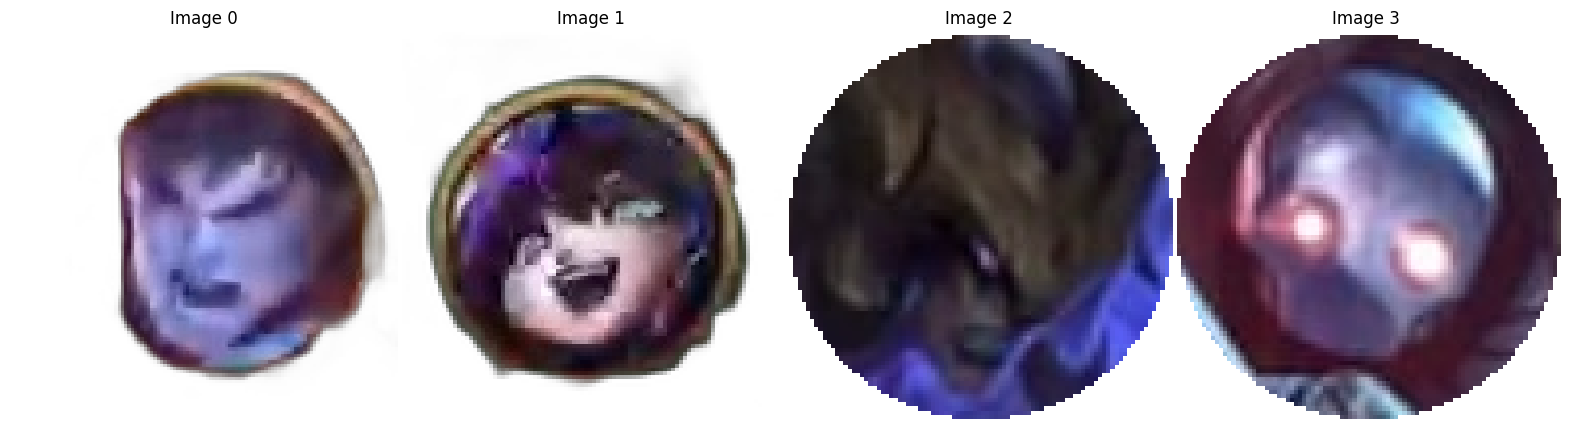

In [ ]:
ShowImage([img_crop0, img_crop1, hero_temp1, hero_temp2], 1, 4)

## Predicting 

In [15]:
def predict_hero(input_path, hero_template_path, out_path):
    IMG, img_names = get_data(input_path)
    hero_Template, hero_names = get_data(hero_template_path)

    lines = []
    for i in range(len(img_names)):
        img_crop = crop_image(IMG[i])
        max_val = -1e10
        name_predict = hero_Template[0]
        for j in range(len(hero_names)):
            hero_temp = circle_crop(hero_Template[j])
            # hero_temp[..., :3] = hero_temp[..., 2::-1]
            # hero_temp = cv2.cvtColor(hero_temp, cv2.COLOR_BGRA2RGB)
            img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2BGRA)

            h = hero_temp.shape[0]
            w = hero_temp.shape[1]
            hero_img = cv2.resize(img_crop, (h,w), interpolation = cv2.INTER_AREA)
            temp = template_match(hero_img, hero_temp)
            if temp[1] > max_val:
                max_val = temp[1]
                name_predict = hero_names[j]
                        
            # ShowImage([hero_temp, hero_img], 1, 4)
            # print(temp)
        name_predict = name_predict.split(".")[0]
        res = img_names[i] + " \t" + name_predict
        lines.append(res)
        # print(res)

        # Write result file
        with open(out_path, 'w') as f:
            for line in lines:
                f.write(line)
                f.write('\n')

In [16]:
out_path = os.path.join("/content/drive/MyDrive/EKLIPSE AI Engineer Test/", "output.txt")
input_path = "/content/drive/MyDrive/EKLIPSE AI Engineer Test/test_data/test_images/"
hero_template_path = "/content/drive/MyDrive/EKLIPSE AI Engineer Test/hero_template/"

predict_hero(input_path, hero_template_path, out_path)

In [ ]:
i = 1
img_crop = crop_image(IMG[i])
max_val = -1e10
name_predict = hero_Template[0]
for j in range(len(hero_names)):
    hero_temp = circle_crop(hero_Template[j])
    # hero_temp[..., :3] = hero_temp[..., 2::-1]
    # hero_temp = cv2.cvtColor(hero_temp, cv2.COLOR_BGRA2RGB)
    img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2BGRA)

    h = hero_temp.shape[0]
    w = hero_temp.shape[1]
    hero_img = cv2.resize(img_crop, (h,w), interpolation = cv2.INTER_AREA)
    temp = template_match(hero_img, hero_temp)
    if temp[1] > max_val:
        max_val = temp[1]
        name_predict = hero_names[j]

    ShowImage([hero_temp, hero_img], 1, 4)
    print(temp)
    

name_predict = name_predict.split(".")[0]
print(name_predict)
print(img_names[i])

Output hidden; open in https://colab.research.google.com to view.